In [1]:
# Dependencies
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import openweathermapy as ow
from datetime import datetime
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
today = datetime.today().strftime('%m-%d-%Y')


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

587


In [3]:
#urls
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = 'Imperial'
query_url = url + "appid=" + api_key +'&units=' + unit + "&q=" 
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=6d38702f00b59779e8caf702b52652d9&units=Imperial&q='

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#output
print('Beginning Data Retrieval\n----------------------------------')
x = 1
y = 1
responses=[]

#for loop for API Calls

for city in cities[0:600]:
    
# items needed in dataFrame
    
    response = requests.get(query_url+city).json()
    
    
    if x == 50:
        x = 0
        y = y + 1
    else:
        try:
            print(f"Processing Record {x} of Set {y} | {response['name']}")
            x = x + 1
            summary = (response['name'],response['clouds']['all'],response['sys']['country'],response['dt'],
            response['main']['humidity'],response['coord']['lat'], response['coord']['lon'], response['main']['temp_max'],
            response['wind']['speed'])
            data = summary
            responses.append(data)
        except KeyError:
            print('City not found. Skipping...')
            
print('-------------------------------\nData Retrieval Complete \n-------------------------------')


Beginning Data Retrieval
----------------------------------
Processing Record 1 of Set 1 | Pevek
Processing Record 2 of Set 1 | Rikitea
Processing Record 3 of Set 1 | Avarua
Processing Record 4 of Set 1 | Chuy
Processing Record 5 of Set 1 | Saskylakh
Processing Record 6 of Set 1 | Kisangani
City not found. Skipping...
Processing Record 7 of Set 1 | Cape Town
Processing Record 8 of Set 1 | Imeni Poliny Osipenko
Processing Record 9 of Set 1 | Cherskiy
Processing Record 10 of Set 1 | Hermanus
Processing Record 11 of Set 1 | Ushuaia
Processing Record 12 of Set 1 | Arraial do Cabo
Processing Record 13 of Set 1 | Bredasdorp
Processing Record 14 of Set 1 | Lorengau
Processing Record 15 of Set 1 | Lavrentiya
Processing Record 16 of Set 1 | New Norfolk
Processing Record 17 of Set 1 | Pangody
Processing Record 18 of Set 1 | Moron
Processing Record 19 of Set 1 | Chokurdakh
Processing Record 20 of Set 1 | Tasiilaq
Processing Record 21 of Set 1 | Punta Arenas
Processing Record 22 of Set 1 | Valpara

Processing Record 31 of Set 4 | Airai
Processing Record 32 of Set 4 | Usinsk
Processing Record 33 of Set 4 | Teya
Processing Record 34 of Set 4 | Pipri
Processing Record 35 of Set 4 | Grindavik
Processing Record 36 of Set 4 | Punta Alta
Processing Record 37 of Set 4 | Chumikan
Processing Record 38 of Set 4 | Hernani
Processing Record 39 of Set 4 | Codrington
City not found. Skipping...
Processing Record 40 of Set 4 | Portland
Processing Record 41 of Set 4 | Mahebourg
Processing Record 42 of Set 4 | Sao Geraldo do Araguaia
Processing Record 43 of Set 4 | Hermagor
Processing Record 44 of Set 4 | Port Keats
Processing Record 45 of Set 4 | Pisco
Processing Record 46 of Set 4 | Boa Vista
Processing Record 47 of Set 4 | Outlook
Processing Record 48 of Set 4 | Fairbanks
Processing Record 49 of Set 4 | Kampong Chhnang
Processing Record 0 of Set 5 | Sibolga
Processing Record 1 of Set 5 | Orgovany
Processing Record 2 of Set 5 | Kahului
Processing Record 3 of Set 5 | Peniche
Processing Record 4 o

City not found. Skipping...
Processing Record 19 of Set 8 | Luau
City not found. Skipping...
Processing Record 20 of Set 8 | Vostok
Processing Record 21 of Set 8 | Kishi
Processing Record 22 of Set 8 | Tromso
Processing Record 23 of Set 8 | Chimore
Processing Record 24 of Set 8 | Umm Lajj
Processing Record 25 of Set 8 | Newark
Processing Record 26 of Set 8 | Kolga
Processing Record 27 of Set 8 | Lekoni
City not found. Skipping...
Processing Record 28 of Set 8 | Krasnoarmeysk
Processing Record 29 of Set 8 | Port Lincoln
Processing Record 30 of Set 8 | Faya
Processing Record 31 of Set 8 | Sioux Lookout
City not found. Skipping...
Processing Record 32 of Set 8 | North Bend
Processing Record 33 of Set 8 | San Jeronimo
City not found. Skipping...
Processing Record 34 of Set 8 | Hanna
Processing Record 35 of Set 8 | Malanje
Processing Record 36 of Set 8 | Isla Vista
Processing Record 37 of Set 8 | Margate
Processing Record 38 of Set 8 | Chimbote
Processing Record 39 of Set 8 | Atambua
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df = pd.DataFrame(responses)
df_new = df.rename(columns = {0: 'City', 1:'Cloudiness',2:'Country',3:'Date',4:'Humidity',5:'Lat',
6:'Lng',7:'Max Temp',8:'Wind Speed'})
df_new.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pevek,5,RU,1561404009,70,69.70,170.27,38.24,9.95
1,Rikitea,69,PF,1561403624,86,-23.12,-134.97,71.18,13.58
2,Avarua,89,CK,1561403802,73,-21.21,-159.78,73.40,4.70
3,Chuy,100,UY,1561404009,90,-33.69,-53.46,60.38,7.11
4,Saskylakh,4,RU,1561403622,50,71.97,114.09,59.84,5.75


In [6]:
df_new.to_csv("Weather_MC.csv", encoding="utf-8", index=False)

In [7]:
df_new.count()

City          513
Cloudiness    513
Country       513
Date          513
Humidity      513
Lat           513
Lng           513
Max Temp      513
Wind Speed    513
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

C:\Users\consi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


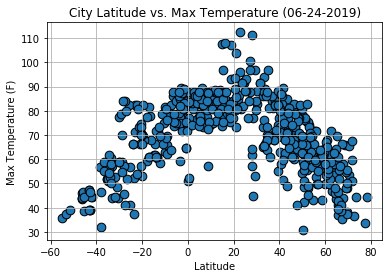

In [8]:
temp = df_new.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp',title = f"City Latitude vs. Max Temperature ({today})", 
marker = 'o', linewidths = 1, grid = 'on', edgecolor = 'black', s =75)
temp.set_xlabel("Latitude")
temp.set_ylabel('Max Temperature (F)')
plt.savefig('temp.png',bbox_inches='tight')

#### Latitude vs. Humidity Plot

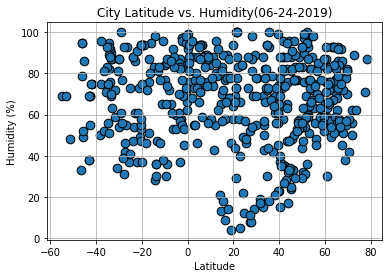

In [9]:
humid = df_new.plot(kind = 'scatter', x = 'Lat', y = 'Humidity',title = f"City Latitude vs. Humidity({today})", 
marker = 'o', linewidths = 1, grid = 'on', edgecolor = 'black', s =75)
humid.set_ylabel('Humidity (%)')
humid.set_xlabel('Latitude')
plt.savefig('humid.png',bbox_inches='tight')

#### Latitude vs. Cloudiness Plot

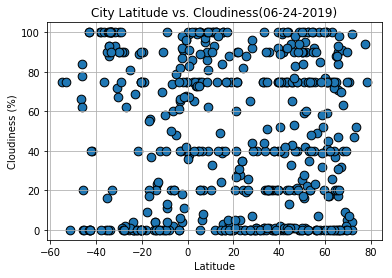

In [10]:
clouds = df_new.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness',title = f"City Latitude vs. Cloudiness({today})", 
marker = 'o', linewidths = 1, grid = 'on', edgecolor = 'black', s =75)
clouds.set_xlabel('Latitude')
clouds.set_ylabel('Cloudiness (%)')
plt.savefig('cloud.png',bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

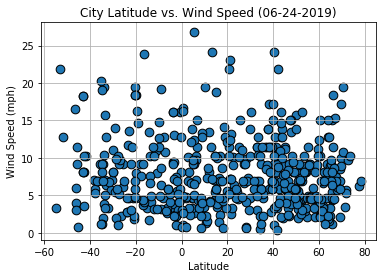

In [11]:
wind = df_new.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed',title = f"City Latitude vs. Wind Speed ({today})", 
marker = 'o', linewidths = 1, grid = 'on', edgecolor = 'black', s =75)
wind.set_ylabel('Wind Speed (mph)')
wind.set_xlabel('Latitude')
plt.savefig('wind.png',bbox_inches='tight')